In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def showimg(img):
	plt.imshow(img, cmap="gray"), plt.xticks([]), plt.yticks([])
	plt.show()

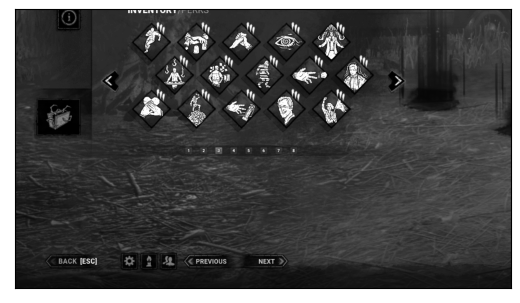

In [4]:
screen = cv2.cvtColor(cv2.imread("screen1.png"), cv2.COLOR_BGR2GRAY)
h,w = screen.shape
screen = screen[h//2:,:w//2]
showimg(screen)

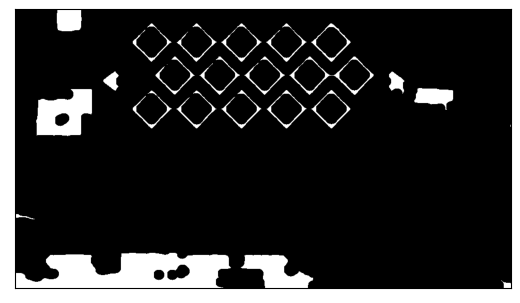

In [5]:
_,black = cv2.threshold(screen, 15, 255, cv2.THRESH_BINARY_INV)
black = cv2.morphologyEx(black, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
showimg(black)

In [6]:
_,_,stats,_ = cv2.connectedComponentsWithStats(black, connectivity=8, ltype=cv2.CV_16U)

In [7]:
widths = [comp[cv2.CC_STAT_WIDTH] for comp in stats if 300 < comp[cv2.CC_STAT_AREA] < 2000]

In [9]:
print(widths)
print(np.mean(widths))
print(np.median(widths))

[48, 75, 77, 78, 78, 77, 76, 78, 78, 82, 80, 30, 30, 78, 77, 76, 75, 78]
70.61111111111111
77.0
